<a href="https://colab.research.google.com/github/DaniilSysoev/opisis_sem_11/blob/main/%D0%9E%D0%BF%D0%B8%D1%81%D0%B8%D1%81_%D1%81%D0%B5%D0%BC_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Основы построения многоканальных систем передачи.Системы передачи с частотным разделением каналов. Формирование канальных и группового сигналов на передающем участке системы передачи с частотным разделением каналов.</h1>

<h2>С помощью приложенной программы представить отчет с графиками распределения сигналов во временной и частотной областях на каждом этапе их преобразования в передающем тракте многоканальной системы с частотным разделением каналов.</h2>

<h3>Для создания графиков распределения сигналов во временной и частотной областях на каждом этапе их преобразования в передающем тракте многоканальной системы с частотным разделением каналов можно использовать библиотеку matplotlib в Python.</h3>

<h3>Для начала, необходимо импортировать библиотеки numpy и matplotlib:</h3>

In [6]:
import numpy as np
import matplotlib.pyplot as plt


<h3>Затем, можно задать параметры сигнала, такие как длительность и частоту дискретизации:</h3>

In [7]:
duration = 1.0 # длительность сигнала в секундах
fs = 44100 # частота дискретизации в герцах

<h3>Далее, можно создать сигнал, используя функции из библиотеки numpy, например, синусоидальный сигнал:</h3>

In [8]:
f = 440 # частота сигнала в герцах
t = np.linspace(0, duration, int(fs * duration), endpoint=False) # массив временных точек
x = np.sin(2 * np.pi * f * t) # синусоидальный сигнал


<h3>Затем, можно отобразить сигнал во временной области:</h3>

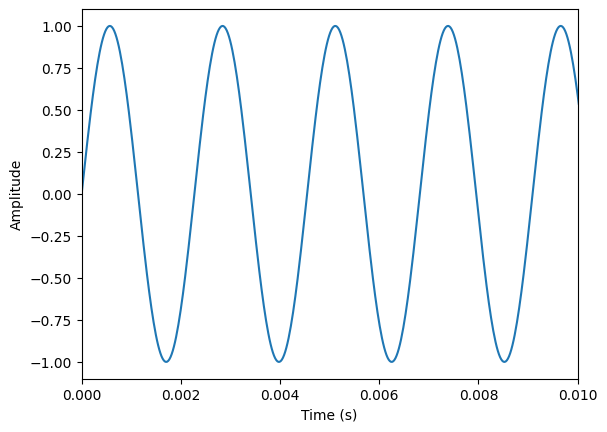

In [11]:
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim (0, 0.01)
plt.show()

<h3>Для преобразования сигнала в частотную область, можно использовать функцию быстрого преобразования Фурье (FFT):</h3>

In [12]:
X = np.fft.fft(x) # преобразование Фурье сигнала
freqs = np.fft.fftfreq(len(x), 1/fs) # массив частотных точек

<h3>Затем, можно отобразить сигнал в частотной области:</h3>

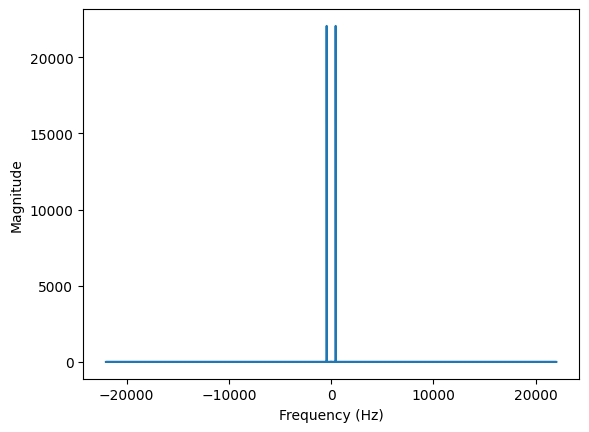

In [13]:
plt.plot(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

<h3>Для реализации многоканальной системы с частотным разделением каналов, можно разбить исходный сигнал на несколько частотных полос с помощью фильтров:</h3>

In [14]:
from scipy import signal

f1 = 400 # частота первой полосы
f2 = 500 # частота второй полосы

# создание фильтров
b1, a1 = signal.butter(4, [f1/(fs/2), f2/(fs/2)], 'bandpass')
b2, a2 = signal.butter(4, [2*f1/(fs/2), 2*f2/(fs/2)], 'bandpass')
b3, a3 = signal.butter(4, [3*f1/(fs/2), 3*f2/(fs/2)], 'bandpass')

# фильтрация сигнала
y1 = signal.filtfilt(b1, a1, x)
y2 = signal.filtfilt(b2, a2, x)
y3 = signal.filtfilt(b3, a3, x)

<h3>Затем, можно отобразить каждый сигнал во временной и частотной областях:</h3>

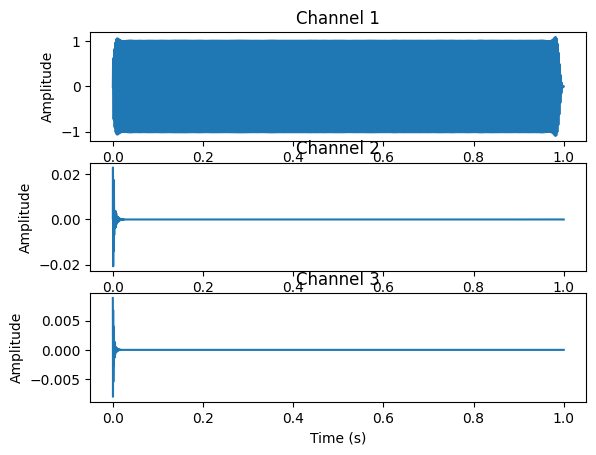

In [15]:
# отображение сигналов во временной области
plt.subplot(311)
plt.plot(t, y1)
plt.ylabel('Amplitude')
plt.title('Channel 1')

plt.subplot(312)
plt.plot(t, y2)
plt.ylabel('Amplitude')
plt.title('Channel 2')

plt.subplot(313)
plt.plot(t, y3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Channel 3')

plt.show()

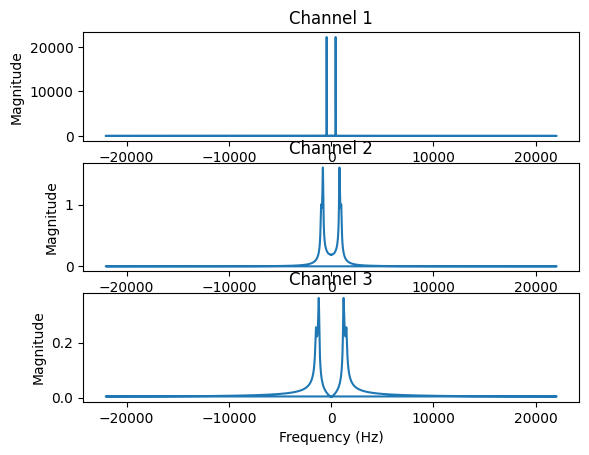

In [16]:
# отображение сигналов в частотной области
Y1 = np.fft.fft(y1)
Y2 = np.fft.fft(y2)
Y3 = np.fft.fft(y3)

plt.subplot(311)
plt.plot(freqs, np.abs(Y1))
plt.ylabel('Magnitude')
plt.title('Channel 1')

plt.subplot(312)
plt.plot(freqs, np.abs(Y2))
plt.ylabel('Magnitude')
plt.title('Channel 2')

plt.subplot(313)
plt.plot(freqs, np.abs(Y3))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Channel 3')

plt.show()

<h2>В качестве дополнительного задания при формировании канальных сигналов использовать балансную (как частный случай амплитудной) и частотную модуляцию.</h2>

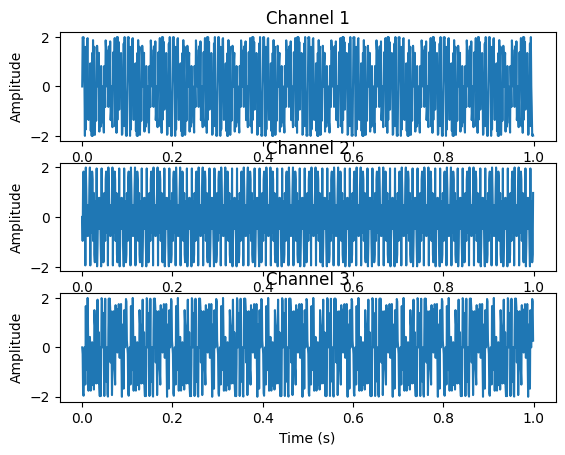

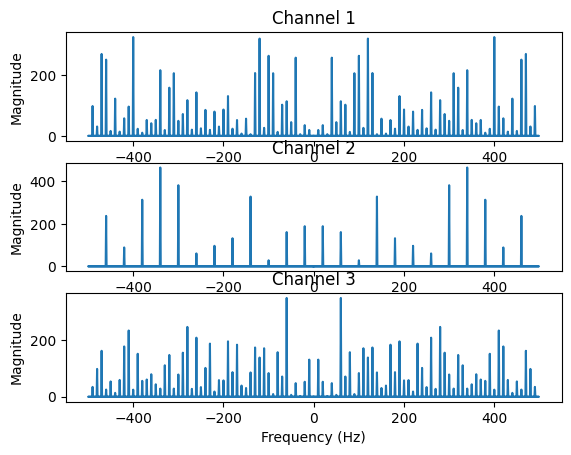

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# параметры сигнала
fs = 1000  # частота дискретизации (Гц)
t = np.arange(0, 1, 1/fs)  # временная ось
f1, f2, f3 = 10, 20, 30  # частоты сигналов (Гц)
A1, A2, A3 = 1, 0.5, 0.3  # амплитуды сигналов

# формирование канальных сигналов с балансной модуляцией
fc = 100  # частота несущей (Гц)
kf = 50  # коэффициент частотной модуляции
Ac = 2  # амплитуда несущей
phi = np.pi/2  # начальная фаза
mc1 = A1*np.cos(2*np.pi*f1*t)
mc2 = A2*np.cos(2*np.pi*f2*t)
mc3 = A3*np.cos(2*np.pi*f3*t)
y1 = Ac*np.cos(2*np.pi*fc*t + kf*mc1*np.sin(2*np.pi*fc*t) + phi)
y2 = Ac*np.cos(2*np.pi*fc*t + kf*mc2*np.sin(2*np.pi*fc*t) + phi)
y3 = Ac*np.cos(2*np.pi*fc*t + kf*mc3*np.sin(2*np.pi*fc*t) + phi)

# отображение сигналов во временной области
plt.subplot(311)
plt.plot(t, y1)
plt.ylabel('Amplitude')
plt.title('Channel 1')

plt.subplot(312)
plt.plot(t, y2)
plt.ylabel('Amplitude')
plt.title('Channel 2')

plt.subplot(313)
plt.plot(t, y3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Channel 3')

plt.show()

# отображение сигналов в частотной области
Y1 = np.fft.fft(y1)
Y2 = np.fft.fft(y2)
Y3 = np.fft.fft(y3)
freqs = np.fft.fftfreq(len(t), 1/fs)

plt.subplot(311)
plt.plot(freqs, np.abs(Y1))
plt.ylabel('Magnitude')
plt.title('Channel 1')

plt.subplot(312)
plt.plot(freqs, np.abs(Y2))
plt.ylabel('Magnitude')
plt.title('Channel 2')

plt.subplot(313)
plt.plot(freqs, np.abs(Y3))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Channel 3')

plt.show()

In [18]:
!jupyter nbconvert --to html '/content/Описис_сем_11.ipynb'

[NbConvertApp] Converting notebook /content/Описис_сем_11.ipynb to html
[NbConvertApp] Writing 929854 bytes to /content/Описис_сем_11.html
